
--- Trend Analysis ---
The rolling mean and rolling standard deviation are calculated over a 365-day window to smooth out short-term fluctuations and highlight long-term trends.
The rolling mean has decreased from nan to 92.67, indicating a downward trend in oil prices over the long term.


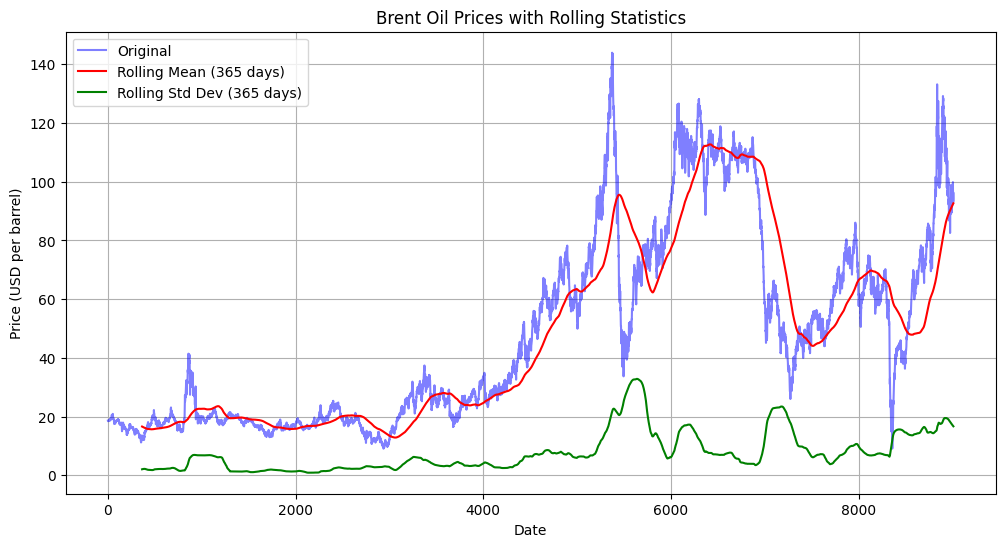

In [12]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = data['Price'].rolling(window=365).mean()  # Rolling window of 365 days
rolling_std = data['Price'].rolling(window=365).std()

# Generate textual summary
print("\n--- Trend Analysis ---")
print("The rolling mean and rolling standard deviation are calculated over a 365-day window to smooth out short-term fluctuations and highlight long-term trends.")
if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print(f"The rolling mean has increased from {rolling_mean.iloc[0]:.2f} to {rolling_mean.iloc[-1]:.2f}, indicating an upward trend in oil prices over the long term.")
else:
    print(f"The rolling mean has decreased from {rolling_mean.iloc[0]:.2f} to {rolling_mean.iloc[-1]:.2f}, indicating a downward trend in oil prices over the long term.")

# Plot the original time series with rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Original', color='blue', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (365 days)', color='red')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std Dev (365 days)', color='green')
plt.title('Brent Oil Prices with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(data['Price'])

# Generate textual summary
print("\n--- Stationarity Test ---")
print("The Augmented Dickey-Fuller (ADF) test is used to check if the time series is stationary.")
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.4f}")

if p_value < 0.05:
    print("Conclusion: The series is stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is non-stationary (fail to reject the null hypothesis).")


--- Stationarity Test ---
The Augmented Dickey-Fuller (ADF) test is used to check if the time series is stationary.
ADF Statistic: -1.9939
p-value: 0.2893
Critical Values:
   1%: -3.4311
   5%: -2.8619
   10%: -2.5669
Conclusion: The series is non-stationary (fail to reject the null hypothesis).



--- Seasonal Decomposition ---
The time series is decomposed into trend, seasonality, and residuals components.
Trend: The overall direction of the time series shows a downward trend over the period.
Seasonality: There is a repeating pattern with an average magnitude of 2.20.
Residuals: These represent the remaining variability after removing trend and seasonality.


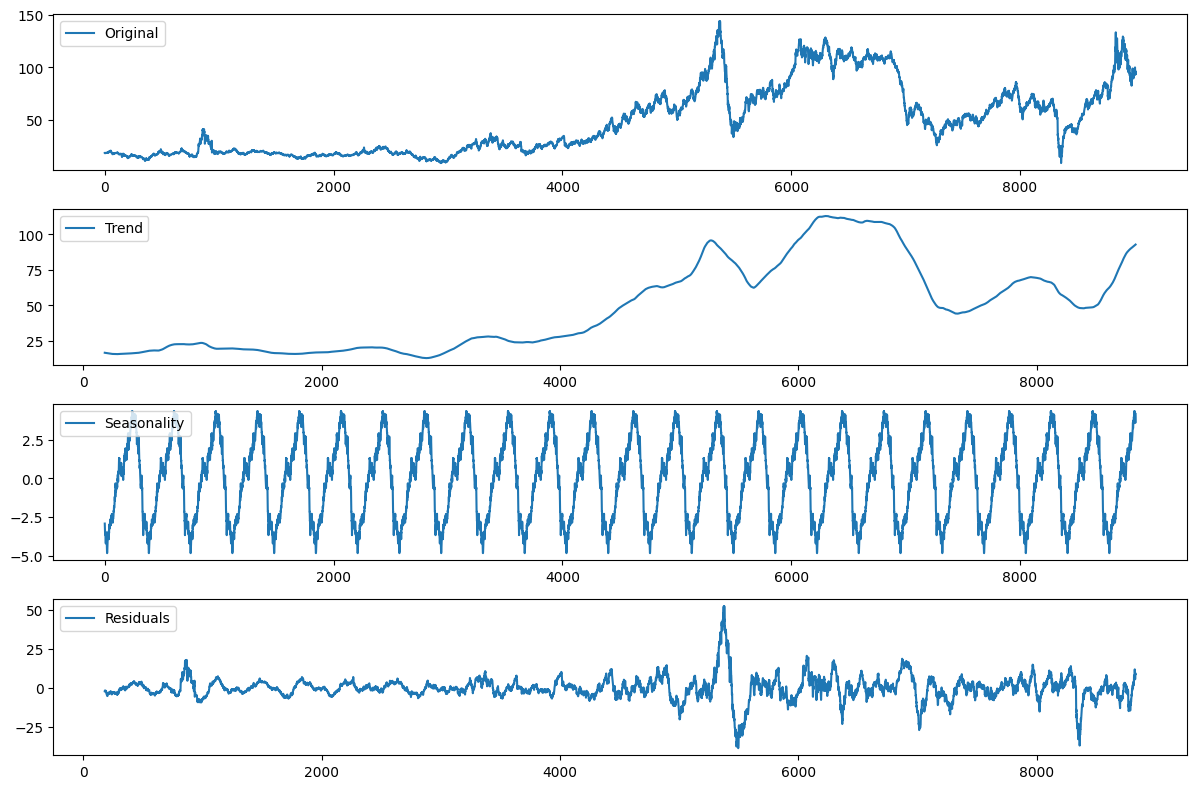

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Price'], model='additive', period=365)

# Generate textual summary
print("\n--- Seasonal Decomposition ---")
print("The time series is decomposed into trend, seasonality, and residuals components.")
print(f"Trend: The overall direction of the time series shows {'an upward trend' if decomposition.trend.iloc[-1] > decomposition.trend.iloc[0] else 'a downward trend'} over the period.")
if decomposition.seasonal.abs().mean() > 0:
    print(f"Seasonality: There is a repeating pattern with an average magnitude of {decomposition.seasonal.abs().mean():.2f}.")
else:
    print("Seasonality: No significant seasonal patterns are observed.")
print("Residuals: These represent the remaining variability after removing trend and seasonality.")

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data.index, data['Price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


--- Volatility Analysis ---
Volatility is measured using a rolling standard deviation over a 90-day window.
Maximum Volatility: 25.46
Minimum Volatility: 0.34
Average Volatility: 3.79


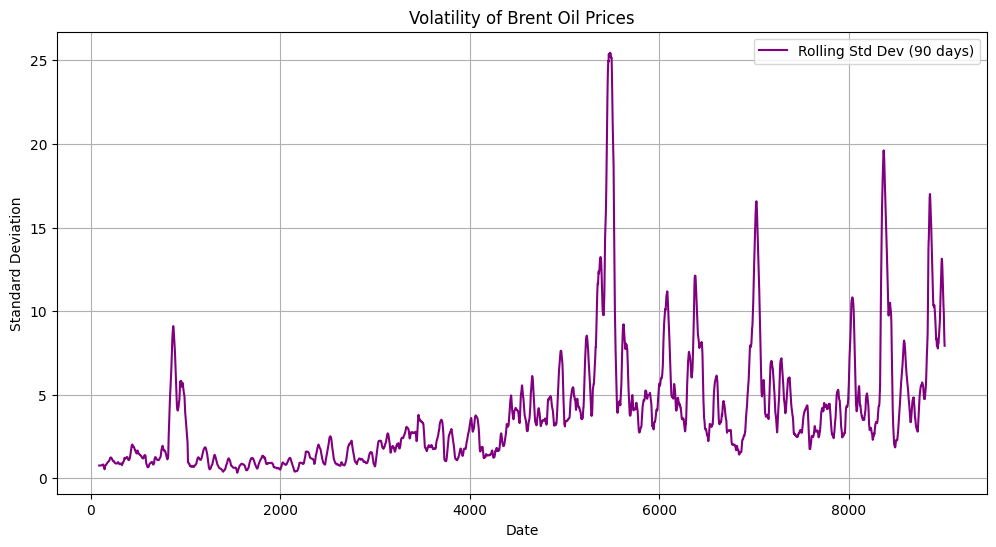

In [15]:
# Calculate rolling standard deviation with a shorter window (e.g., 90 days)
rolling_std_90 = data['Price'].rolling(window=90).std()

# Generate textual summary
print("\n--- Volatility Analysis ---")
print("Volatility is measured using a rolling standard deviation over a 90-day window.")
max_volatility = rolling_std_90.max()
min_volatility = rolling_std_90.min()
avg_volatility = rolling_std_90.mean()
print(f"Maximum Volatility: {max_volatility:.2f}")
print(f"Minimum Volatility: {min_volatility:.2f}")
print(f"Average Volatility: {avg_volatility:.2f}")

# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(rolling_std_90.index, rolling_std_90, label='Rolling Std Dev (90 days)', color='purple')
plt.title('Volatility of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

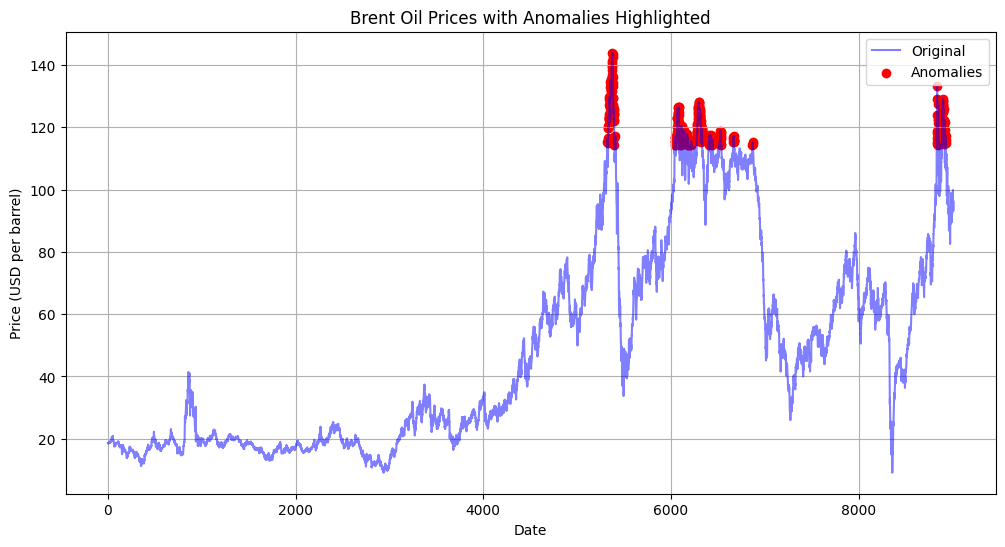

In [20]:
# Define thresholds for anomaly detection
upper_threshold = data['Price'].mean() + 2 * data['Price'].std()
lower_threshold = data['Price'].mean() - 2 * data['Price'].std()

# Identify anomalies
anomalies = data[(data['Price'] > upper_threshold) | (data['Price'] < lower_threshold)]

# Plot the time series with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Original', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['Price'], color='red', label='Anomalies')
plt.title('Brent Oil Prices with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()